Problem 2 (20 Points): SVD: Image Compression

In [24]:
import numpy as np
from matplotlib.image import imread

In [25]:
img = imread('mandrill_color.png')

In [26]:
X = np.mean(img, -1)

1. Read the given image file (’mandrill color.png’), and convert it into grayscale by averaging
the R,G,B values for each pixel. Your image is now a 288 × 288 matrix; call it X.

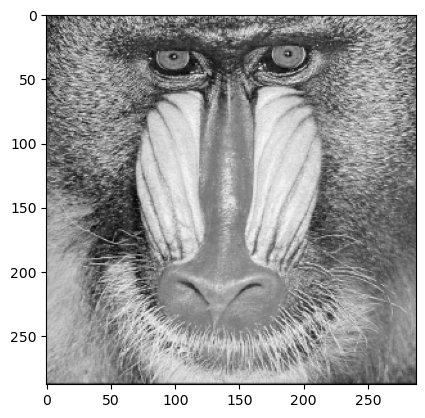

In [30]:
plotImage = plt.imshow(X)
plotImage.set_cmap('gray')

2. Perform an SVD of X to obtain the decomposition {U,Σ,V}. Plot the singular values (i.e.,
the diagonal entries of Σ) in decreasing order.

In [31]:
U,Diagonal,V = np.linalg.svd(X)

In [35]:
print("The shape of the image is: ")
U.shape

The shape of the image is: 


(288, 288)

In [38]:
diagonalValues = np.diag(Diagonal)

<Figure size 800x600 with 0 Axes>

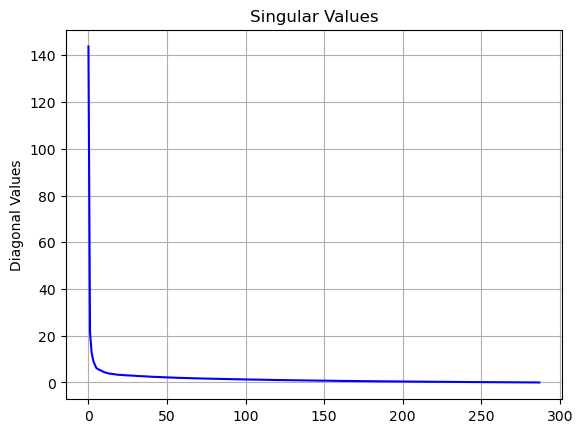

<Figure size 800x600 with 0 Axes>

In [42]:
plt.plot(np.diag(diagonalValues), color = 'b')
plt.grid()
plt.ylabel('Diagonal Values')
plt.title('Singular Values')
plt.figure(figsize=(8, 6))


3. Choose k = 10, and reconstruct an approximation of X using the top k singular values and
vectors, Uk, Vk, and Σk. Display this approximation, and calculate how many numbers you needed to
store this approximate image representation. Divide by the original size of X to get the compression
ratio.

In [55]:
def ImageReconstruct(k,U,diagonalEntries,V):
  Xapp = U[:,:k] @ diagonalEntries[:k,:k] @ V[:k,:]
  img = plt.imshow(Xapp)
  img.set_cmap('gray')
  plt.show()
  return ((k*288)+k+(k*288))/(288*288)

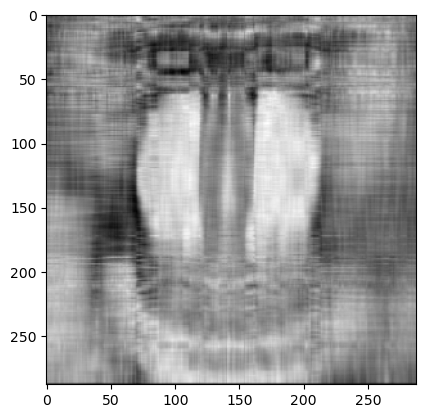

In [59]:
k_10 = ImageReconstruct(10,U,diagonalValues,V)

In [60]:
dataofCR = [{'k':10,'compressionratio': k_10}]
compressionRatio = pd.DataFrame(dataofCR)

In [61]:
compressionRatio.head()

,k,compressionratio
0,10,0.069565


4. Repeat this experiment for k = 20, 40, 60. Display these images, and report their compression
ratios in the form of a table. Is there any benefit in going for higher k?

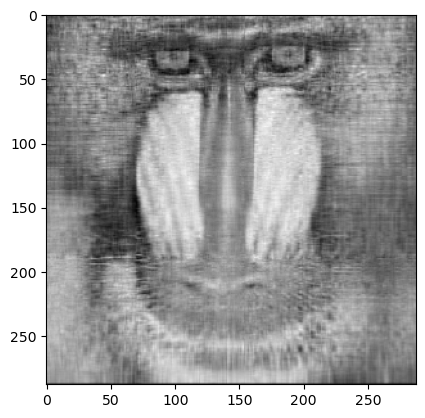

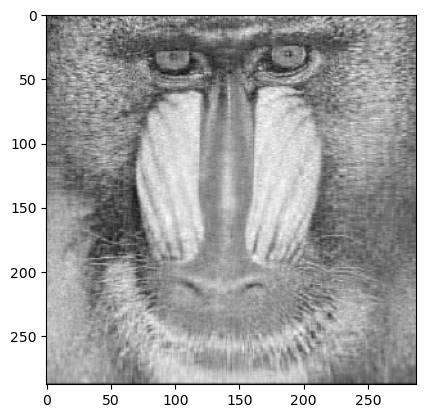

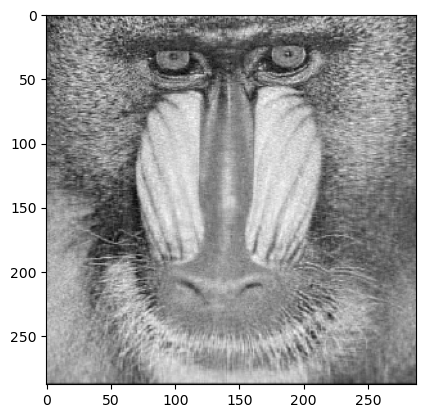

In [62]:
data = []
for k in [20,40,60]:
  Ratio = ImageReconstruct(k,U,diagonalValues,V)
  dataOfRatio = {'k': k , 'compressionratio': Ratio }
  data.append(dataOfRatio)

In [63]:
compressionRatio.append(data)

/var/folders/d4/wt0b2xf50vjcg4jz9ymp4zk80000gn/T/ipykernel_1369/2832825118.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compressionRatio.append(data)


,k,compressionratio
0,10,0.069565
0,20,0.139130
1,40,0.278260
2,60,0.417390


In [67]:
print("The image is nearly clear, as we can see above. Even though increasing k would be useless because the image is already successfully read at k = 60 and has an acceptable compression ratio, doing so might produce a significantly better image quality.")

The image is nearly clear, as we can see above. Even though increasing k would be useless because the image is already successfully read at k = 60 and has an acceptable compression ratio, doing so might produce a significantly better image quality.
